#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


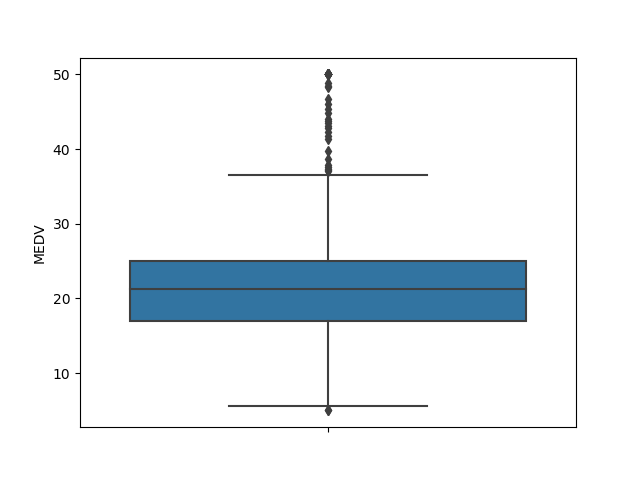

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [58]:
ax=sns.boxplot(y='MEDV',data=boston_df)
pyplot.show()


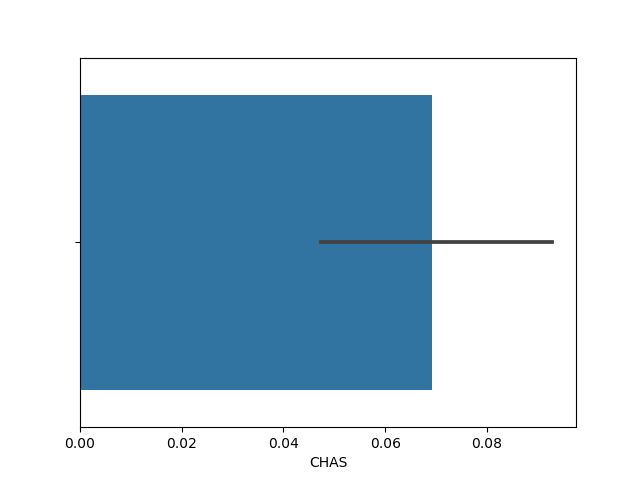

In [59]:

ax=sns.barplot(x='CHAS',data=boston_df)
pyplot.show()

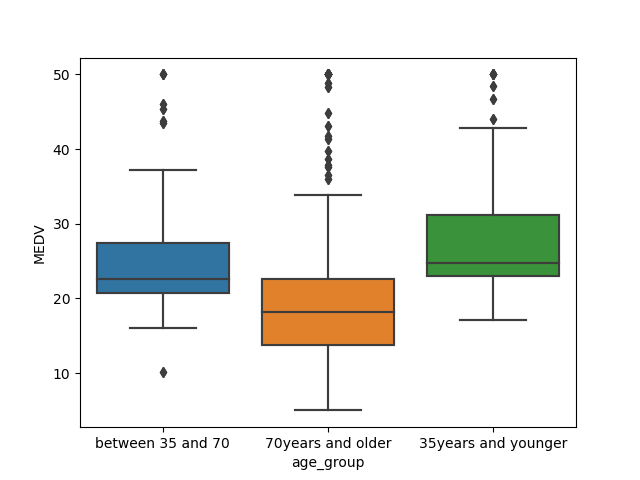

In [73]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70years and older'

ax=sns.boxplot(y='MEDV',x='age_group',data=boston_df)
pyplot.show()

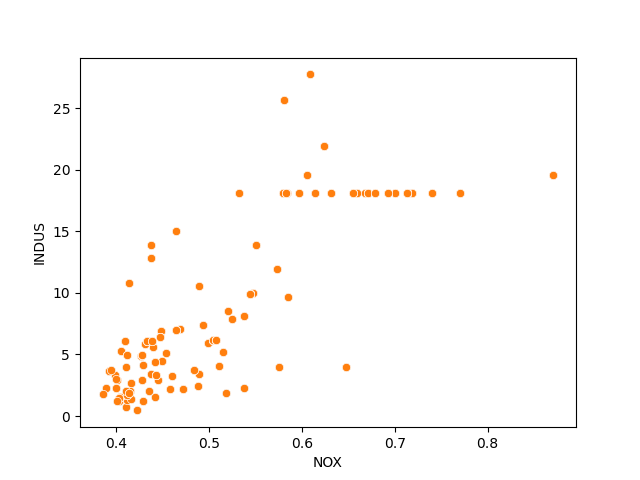

In [75]:
ax=sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
pyplot.show()
## The relationship between two variables seems to be positive relativlely.

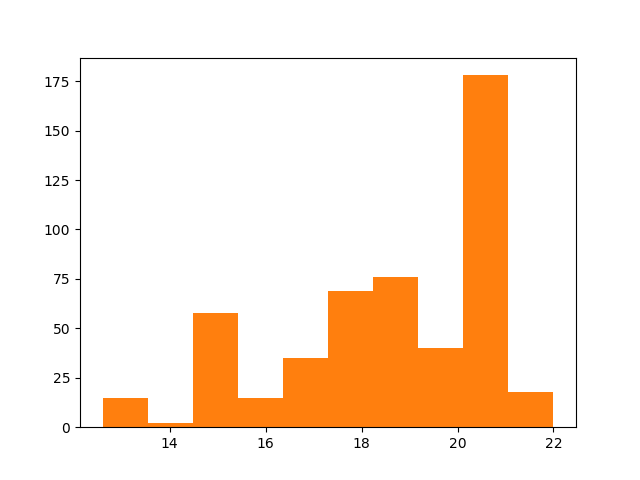

In [77]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.show()

In [82]:
##The null hypothesis states that no difference in median value of houses bounded by Charles river or not. 
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=True)
##The p-value is less than 0.05 so null hypothesis is rejected.
## Therefore there is enough evidence that there is difference in median value of houses bounded by Charles river or not. 


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [84]:
##The null hypothesis state that no difference in MEDV between 3 categories. 
group1=boston_df[boston_df['age_group']=='35years and younger']['MEDV']
group2=boston_df[boston_df['age_group']=='between 35 and 70']['MEDV']
group3=boston_df[boston_df['age_group']=='70years and older']['MEDV']
f_statistic,p_value=scipy.stats.f_oneway(group1,group2,group3)
print("F_statistic:{0},p_value:{1}".format(f_statistic,p_value))

##p-value is less than 0.05 so null hypothesis is rejected. 
##Therefore there is significant evidence that at least one of 3 categories differ. 

F_statistic:36.40764999196599,p_value:1.7105011022702984e-15


In [85]:
##The null hypothesis state that no correlation between two variables.
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
##The p-value is less than 0.05 so the null hypothesis is rejected.
##Therefore there is enough evidence that there is correlation between NOX and INDUS. 

(0.7636514469209189, 7.913361061211254e-98)

In [86]:
##The null hypothesis states that DIS has no impact on the MEDV.
X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()
##p-value is less than 0.05 so the null hypothesis is rejected.
##Therefore there is enough evidence that additional DIS variable has an impact on MEDV. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        23:50:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""